In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "D:/MMM Project/Advertising Budget and Sales.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Display the first few rows
display(df.head())





,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [44]:
# Display the first few rows
print(df.head())

   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  


In [28]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


In [29]:
# Basic Statistics
print("\nDataset Summary:\n", df.describe())



Dataset Summary:
        TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
count        200.000000           200.000000               200.000000   
mean         147.042500            23.264000                30.554000   
std           85.854236            14.846809                21.778621   
min            0.700000             0.000000                 0.300000   
25%           74.375000             9.975000                12.750000   
50%          149.750000            22.900000                25.750000   
75%          218.825000            36.525000                45.100000   
max          296.400000            49.600000               114.000000   

        Sales ($)  
count  200.000000  
mean    14.022500  
std      5.217457  
min      1.600000  
25%     10.375000  
50%     12.900000  
75%     17.400000  
max     27.000000  


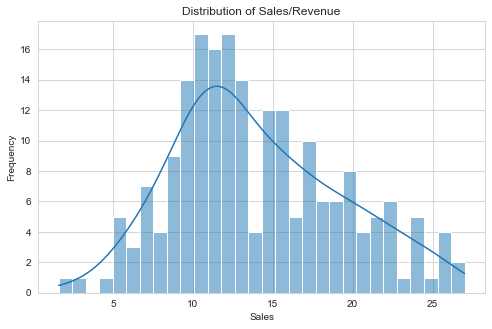

In [31]:
# Visualize distribution of Sales/Revenue
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales ($)'], bins=30, kde=True)
plt.title("Distribution of Sales/Revenue")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

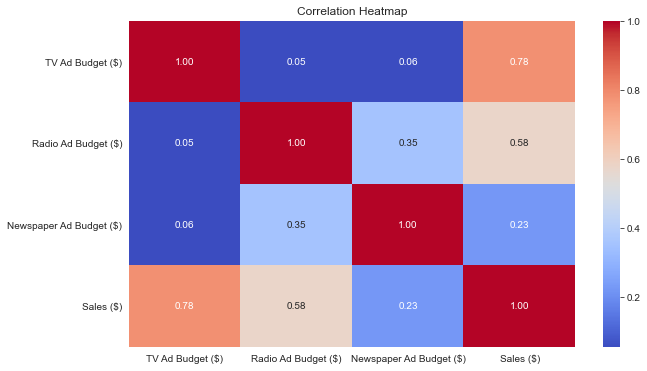

In [47]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

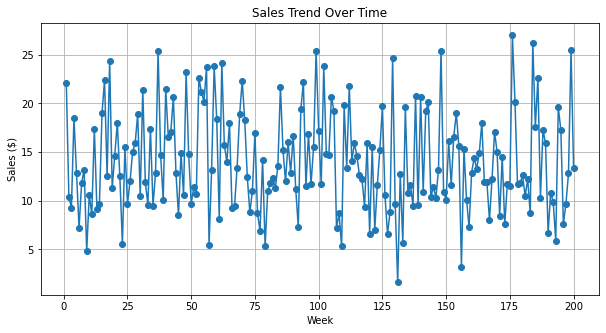

In [13]:
# Plot the trend of sales over time
plt.figure(figsize=(10, 5))
plt.plot(df['Week'], df['Sales ($)'], marker='o', linestyle='-')
plt.xlabel("Week")
plt.ylabel("Sales ($)")
plt.title("Sales Trend Over Time")
plt.grid(True)
plt.show()

In [33]:
# Define Features and Target
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]  # Features
y = df['Sales ($)']  # Target

In [34]:
# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:
# Print shapes of training and testing data
print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (160, 3)
Testing Data Shape: (40, 3)


In [37]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Display model coefficients & intercept
print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [3.83060599 2.80191171 0.05998274]
Intercept: 14.042004239811021


In [39]:
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [40]:
# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [41]:
# Print the evaluation results
print("\nTraining Set Performance:")
print(f"MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, R²: {r2_train:.2f}")

print("\nTesting Set Performance:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, R²: {r2_test:.2f}")


Training Set Performance:
MAE: 1.20, MSE: 2.71, R²: 0.90

Testing Set Performance:
MAE: 1.46, MSE: 3.17, R²: 0.90
